# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix

# Import the dataset

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\projects\tested.csv')

# Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

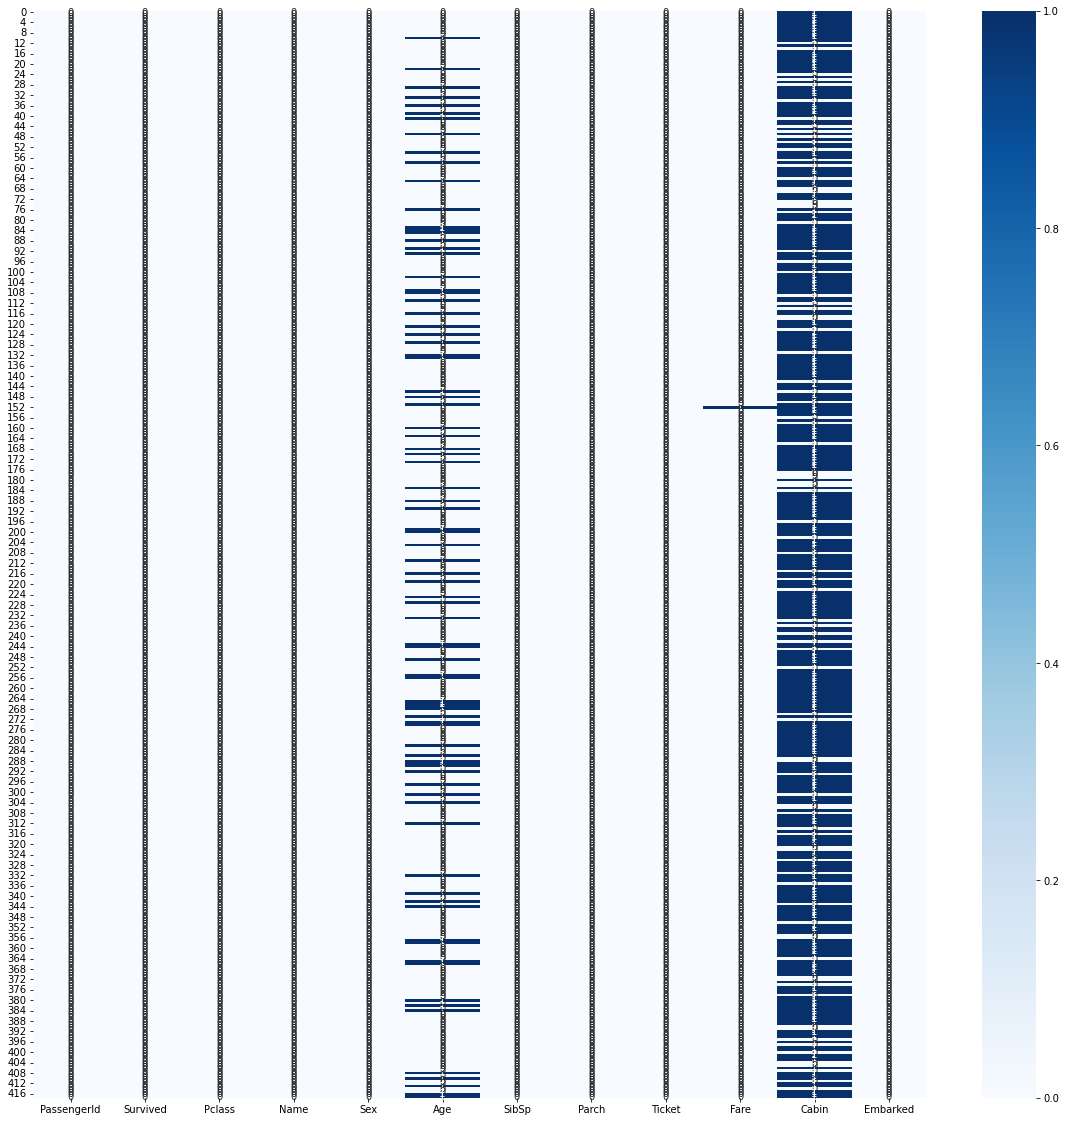

In [9]:
plt.figure(figsize =(20,20))
sns.heatmap(df.isnull(),annot=True,cmap='Blues')

In [10]:
## Percentage of Age is null 
(df.Age.isnull().sum()/len(df.Age))*100

20.574162679425836

In [11]:
## percentage of Fare is null
(df.Fare.isnull().sum()/len(df.Fare))*100

0.23923444976076555

In [12]:
## percentage of Cabin is null
(df.Cabin.isnull().sum()/len(df.Cabin))*100

78.22966507177034

In [13]:
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [14]:
# dropping irrelevant features
df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [16]:
 df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [17]:
df.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [18]:
##mean of Age column
df.Age.mean()

30.272590361445783

In [19]:
##median of Age column
df.Age.median()

27.0

In [20]:
##mode of Age column
df.Age.mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [21]:
# fill all the null values in the age column with its median value

df.Age.fillna(value=df.Age.median(), inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [23]:
df.Fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [24]:
##mean of Fare column
df.Fare.mean()


35.6271884892086

In [25]:
##median of Fare column
df.Fare.median()


14.4542

In [26]:
##mode of Fare column
df.Fare.mode()

0    7.75
Name: Fare, dtype: float64

In [27]:
# fill all the null values in the fare column with its median value

df.Fare.fillna(value=df.Fare.median(), inplace=True)

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data visualization

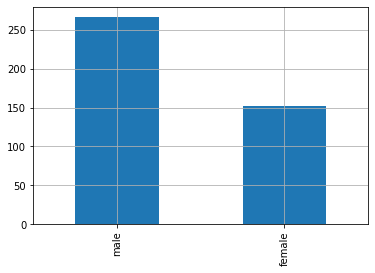

In [29]:
## Plot a graph : strength of Male VS Strength of female
df.Sex.value_counts().plot.bar(df.Sex )
plt.grid()

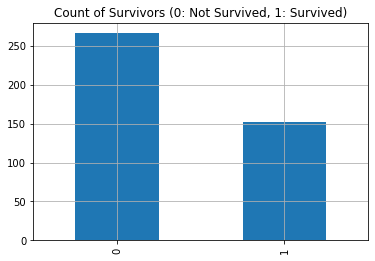

In [30]:
## Plot a graph : strength of Survival VS Strength of Non-survival
df.Survived.value_counts().plot.bar(df.Survived )
plt.title('Count of Survivors (0: Not Survived, 1: Survived)')
plt.grid()

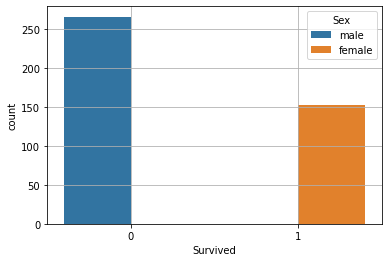

In [31]:
## Plot a graph to find out the Survival & Non-survival rate wrt Sex
sns.countplot(x='Survived', data=df, hue='Sex')
plt.grid()

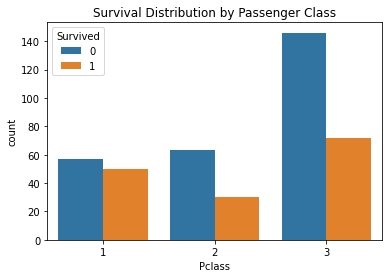

In [32]:
## Plot a graph to find out the strength of the Pclass

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.show()

In [33]:
df['Embarked'].value_counts()
# 2-S, 0-C, 1-Q


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
df['Sex'].value_counts() 
# male - 1, female - 0

male      266
female    152
Name: Sex, dtype: int64

In [35]:
# convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [38]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,0.008035,0.099943,0.159120,0.192036,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.467853,0.001087,0.018721,-0.577313,0.227983
Sex,-1.000000,0.108615,1.000000,-0.008035,-0.099943,-0.159120,-0.192036,0.076281
Age,0.008035,-0.467853,-0.008035,1.000000,-0.071197,-0.043731,0.342357,-0.148051
SibSp,0.099943,0.001087,-0.099943,-0.071197,1.000000,0.306895,0.171912,0.052708
Parch,0.159120,0.018721,-0.159120,-0.043731,0.306895,1.000000,0.230325,0.054577
Fare,0.192036,-0.577313,-0.192036,0.342357,0.171912,0.230325,1.000000,-0.257624
Embarked,-0.076281,0.227983,0.076281,-0.148051,0.052708,0.054577,-0.257624,1.000000


<AxesSubplot:>

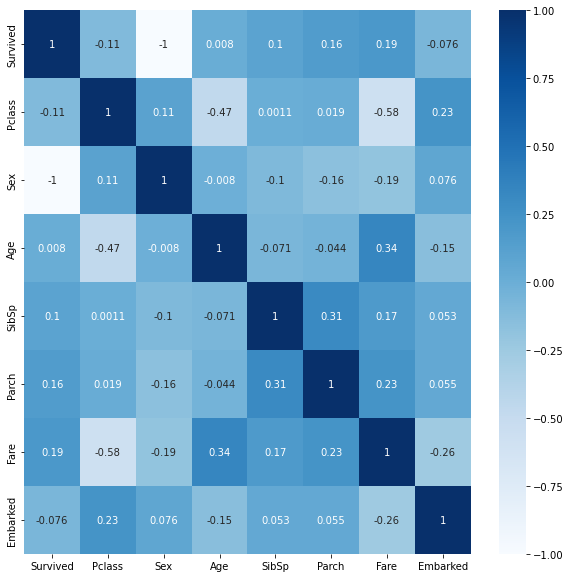

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True, cmap='Blues')

<Figure size 1440x1440 with 0 Axes>

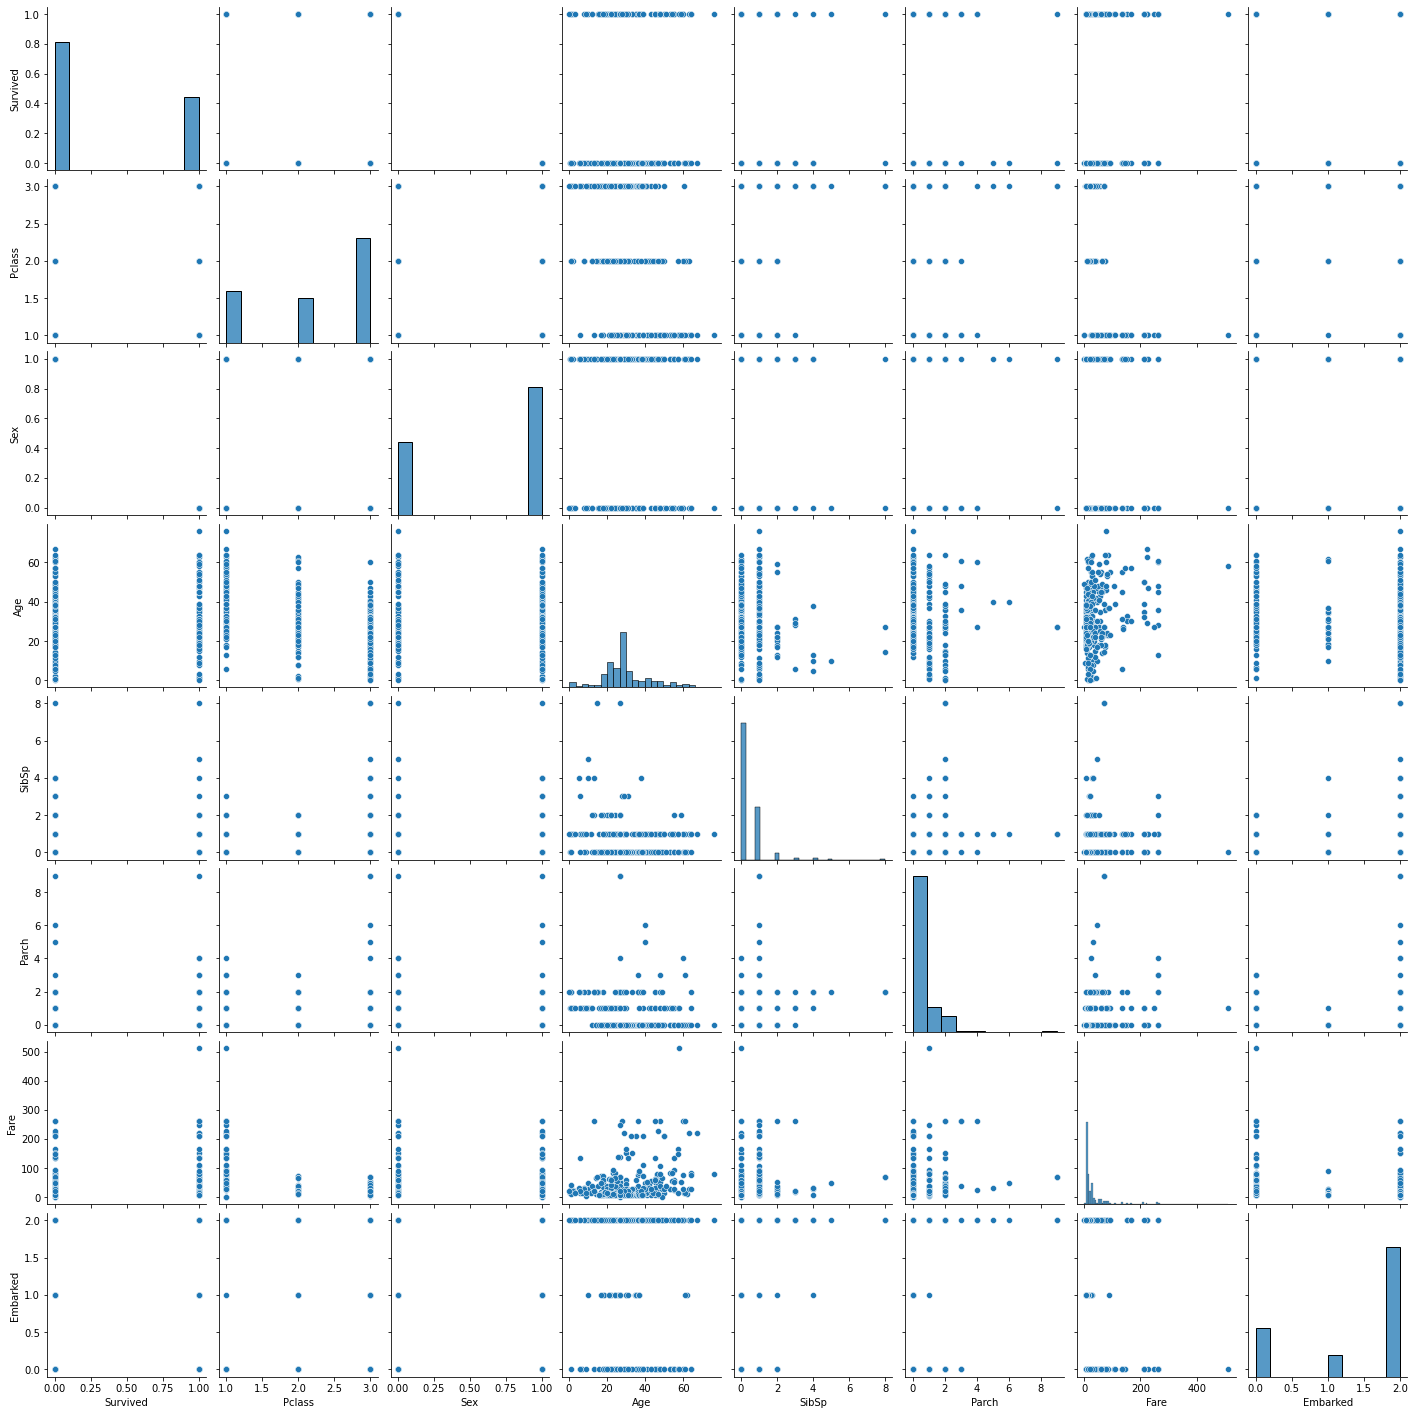

In [40]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

# Separating data 

In [41]:
x = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

# Data Splitting

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# Data Modeling 

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred= lr.predict(x_test)

In [45]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [46]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,92,0
Actual Yes,0,46


### Performance

In [47]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [48]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is: ',accuracy)

Accuracy is:  1.0
